# **Partie 2 : Réglages pour le levier "Efficacité"**
<a id="0"></a>


L'objectif de ce Notebook est de réaliser des analyses pour paramétrer des scénarios technologiques concernant l'évolution de l'efficacité énergétique des avions.

Sommaire :<br>
[1. Évaluation des gains historiques](#1)<br>
[2. Amélioration de l'efficacité énergétique via de nouvelles technologies avion](#2)<br>
[3. Amélioration de l'efficacité énergétique via les opérations](#3)<br>
[4. Amélioration de l'efficacité énergétique via le taux de remplissage](#4)<br>
-----
-----

## 1. Évaluation des gains historiques
<a id="1"></a>

L'objectif de cette partie est d'estimer les gains historiques dus à l'amélioration de l'efficacité énergétique des avions.

-----
### 1.1. Tracé de l'évolution historique des facteurs de l'identité de Kaya

Un outil pertinent pour étudier les émissions de CO<sub>2</sub> du secteur aérien est d'utiliser l'identité de Kaya adaptée présentée ci-dessous :

$CO_2 = RPK \times \frac{E}{RPK} \times \frac{CO_2}{E}$

avec $CO_2$ la quantité de CO<sub>2</sub> émise par le secteur aérien, $RPK$ le nombre de passagers-kilomètres qui mesure le trafic aérien et $E$ l'énergie utilisée par le secteur aérien. Apparaissent alors deux ratios technologiques pertinents : l'intensité énergétique $\frac{E}{RPK}$ et l'intensité carbone $\frac{CO_2}{E}$.

À partir des données fournies, tracez l'évolution de ces différents facteurs pour le secteur aérien entre 1973 et 2018. La représentation pourra être faite à partir d'une base 1 en 1973 et en utilisant une échelle logarithmique pour les ordonnées.

In [33]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

csv = pd.read_csv('./Data/Aviation_Data.csv', sep=';')

database = csv.values
year = database[:,0]
rpk = database[:,2]
ask = database[:,1]
energy = database[:,3]
co2 = database[:,4]



csv.head()
#csv.style

,Year,RPK [millions passenger-kilometer],ASK [millions seat-kilometer],Energy [MJ],CO2 [MtCO2]
0,1973,1107532.0,656426.0,5107896000000,365.68
1,1974,1178880.0,697285.0,4940424000000,353.69
2,1975,1269815.0,763762.0,4940424000000,353.69
3,1976,1346260.0,818300.0,4940424000000,353.69
4,1977,1451184.0,936352.0,5275368000000,377.67


Text(0, 0.5, 'CO2 / Energie')

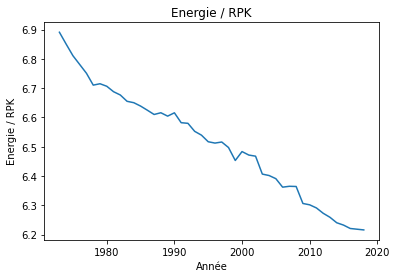

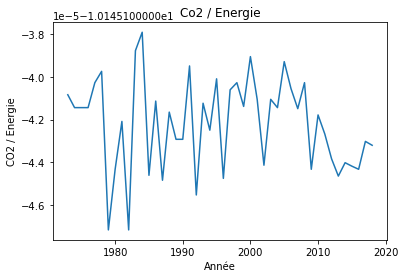

In [34]:

plt.figure(1)

plt.plot(year, log10(energy/rpk))
plt.title('Energie / RPK') 
plt.xlabel('Année')
plt.ylabel('Energie / RPK')

plt.figure(2)
 
plt.plot(year, log10(co2/energy))
plt.title('Co2 / Energie')
plt.xlabel('Année')
plt.ylabel('CO2 / Energie')




-----
### 1.2. Décomposition des gains d'efficacité énergétique

Le facteur d'intensité énergétique peut être amélioré par 3 moyens : améliorer les performances des avions via de nouvelles technologies (moteurs, aérodynamique, systèmes...), améliorer les opérations au sol et en vol et améliorer le taux de remplissage. Si distinguer les deux premiers leviers d'efficacité est complexe, il est facile de séparer ces derniers du taux de remplissage.

Séparez les gains d'efficacité énergétique en terme de taux de remplissage et de technologies/opérations en traçant un ou plusieurs graphes de votre choix.

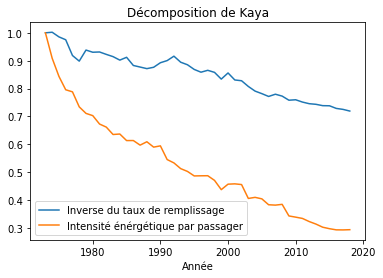

In [40]:
plt.figure(1)
plt.xlabel('Année')
# plt.plot(year, energy/ask, label="Intensité énérgétique par avion")
# plt.plot(year, rpk/ask, label="Inverse de la capacité par avion")
plt.plot(year, (ask/rpk)/(ask[0]/rpk[0]), label="Inverse du taux de remplissage")
plt.plot(year, (energy/ask)/(energy[0]/ask[0]), label="Intensité énérgétique par passager")
plt.title('Décomposition de Kaya') 
plt.legend()



 


### 1.3. Estimations des gains d'efficacité annuel moyen et par décennie

Afin d'obtenir des ordres de grandeur, déterminez les gains historiques annuels moyens pour l'efficacité. Vous ferez aussi la distinction entre les gains issus de l'amélioration du taux de remplissage et ceux issus de la technologie et des opérations. Commentez.

ValueError: x and y must have same first dimension, but have shapes (31,) and (46,)

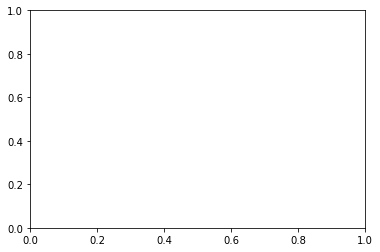

In [143]:

gain_eff=linspace(0,1,46)
gain_eff[45]=0
gain_taux_remplissage=linspace(0,1,46)
gain_taux_remplissage[45]=0
intens_energetique=energy/ask

gain_moyen_annuel=((intens_energetique[45]-intens_energetique[0])/intens_energetique[0])**1/46
gain_total=(intens_energetique[45]-intens_energetique[0])/intens_energetique[0]
for i in range(len(energy)):
    if i<45:
        gain_eff[i]=(intens_energetique[i+1]-intens_energetique[i])/intens_energetique[i]
        #gain_moyen_annuel=gain_eff[i]*gain_moyen_annuel
        gain_taux_remplissage[i]=1-((ask[i+1]/rpk[i+1])/(ask[i]/rpk[i]))
           
plt.plot(year, gain_eff, label="Gain moyen d'efficacité pur")
# plt.plot(year,(evol_taux_remplissage)/(evol_taux_remplissage[0]), label="Evolution remplissage")
# plt.plot(year,(rpk/ask)/(rpk[0]/ask[0]), label="Evolution remplissage")
plt.plot(year, gain_eff-gain_taux_remplissage, label="Gain moyen d'efficacité technologique")

plt.title('Gains historiques')
plt.xlabel('Année')

plt.legend()

print ('Gain moyen annuel',gain_moyen_annuel)
print ('Gain total',gain_total)


               

> **Réponses**

-----
-----
## 2. Amélioration de l'efficacité énergétique via de nouvelles technologies avion
<a id="2"></a>

L'objectif de cette partie est de modéliser les améliorations de l'efficacité énergétique des avions en intégrant de nouvelles technologies plus efficaces. Pour obtenir une meilleur granularité dans les modélisations, la flotte est divisée en 4 catégories principales : 
- court-courrier passagers (<1500 km, composée de 3 sous-catégories : régional turbofan, régional turboprop, *narrow-body* turbofan conventionnel)
- moyen-courrier passagers (>1500km et <4000 km, de type *narrow-body* majoritairement)
- long-courrier passagers (>4000 km, de type *wide-body* majoritairement)
- fret (toute distance franchissable, incluant *belly cargo* et *freighter*)

Deux approches seront considérées :
- une approche *bottom-up* basée sur l'intégration de nouveaux avions via des modèles de renouvellement de flotte ; elle sera appliquée pour les avions de type court-courrier conventionnel et moyen-courrier 
- une approche *top-down* basée sur l'utilisation d'un gain annuel moyen estimé ; elle sera appliquée pour les avions de type court-courrier régional, long-courrier et fret

-----
### 2.1. Approche *bottom-up*

Cette partie se focalise sur une approche *bottom-up* basée sur l'intégration de nouveaux avions dans la flotte. L'analyse se concentre sur les avions de type moyen-courrier. Pour les avions de type court-courrier conventionnel, les mêmes avions peuvent être considérés en première approximation et ne sont donc pas étudiés en détail ici.

#### 2.1.1. Choix des architecture avion et avions futurs

Définissez des avions distincts qui pourraient voir le jour entre aujourd'hui et 2050. Vous avez aussi la possibilité de créer des architectures spécifiques (qui pourront être composées de plusieurs avions successifs) qui occuperont à terme des parts de marché distinctes. Voici quelques exemples possibles : architecture conventionnelle *narrow-body* à turbofan (présente de base), architecture équipée de turbopropulseurs, architecture hydrogène... 

Expliquez votre démarche sur le choix des catégories et des avions. Limitez vous pour simplifier à maximum 3 architectures (en incluant celle conventionnelle) et à maximum 2 avions par nouvelle architecture.

Vous devrez fournir pour chaque avion, en complétant le tableau ci-dessous via les cellules, une année de mise sur le marché, un type de carburant utilisé (drop-in ou hydrogène) et un gain en efficacité énergétique par rapport à la référence de l'Airbus A320neo (considéré comme l'avion le plus récent et le plus efficace de cette catégorie). 

Pour vous aider, des données issues de l'IATA sont disponibles ci-dessous. Vous avez aussi la possibilité de trouver des sources supplémentaires (notamment pour les architectures hydrogène).
- https://aviation.report/Resources/Whitepapers/6e0df8d7-f381-4a56-bef4-3f83fe8f65e1_IATA%20TECHNOLOGY%20ROADMAP%202013.pdf
- https://www.iata.org/contentassets/8d19e716636a47c184e7221c77563c93/Technology-roadmap-2050.pdf


> **Réponses**

|Nom de l'architecture avion|Type de carburant utilisé|Part de marché|
|--|--|--|
|Narrow-body turbofan|Drop-in|60%|
|Narrow-body hydrogen engine|Hydrogen|20%|
|Narrow-body turboprop|Drop-in|20%|

|Nom de l'avion|Architecture avion|Année de mise sur le marché|Gains en % par rapport à la référence|
|--|--|--|--|
|A320Neo|Narrow-body turbofan|2016|0|
|A320Neo with open rotor|Narrow-body turbofan|2035|+30%|
|A320 with new engine option|Narrow-body next gen turbofan|2030|+25%|
|Airbus future A320 family|Narrow-body hydrogen engine|2035|+22%|
|Airbus future A320 family with morphing wing|Narrow-body hydrogen engine|2040|+40%|
|Embraer|Narrowbody with next gen turboprop|2028|+25%|
|Embraer|Narrowbody with 0 emission|2045|+100%|

#### 2.1.2. Application d'un modèle de renouvellement de flotte

Une fois ces architectures et avions définis, il est possible de construire l'évolution future de l'efficacité énergétique des avions de cette catégorie moyen-courrier en utilisant des modèles de renouvellement de flotte spécifiques. Ils sont basés sur l'utilisation de fonctions logistiques (aussi appelées sigmoïdes ou courbes en S).

Ces modèles nécessitent de définir une durée pour renouveller l'ensemble de la flotte. Par défaut, cette valeur peut être considérée comme égale à 25 ans mais vous avez la possibilité de choisir une valeur plus petite pour considérer une accélération du rythme de renouvellement.

Complétez le code Python avec vos hypothèses et commentez les résultats obtenus pour le renouvellement de flotte et l'évolution de l'efficacité énergétique. Vous comparerez notamment aux valeurs historiques obtenues avec l'identité de Kaya. Vous réaliserez aussi une analyse de sensibilité sur la durée de renouvellement de la flotte.

In [120]:
### SAISISSEZ VOS VALEURS ICI (SANS MODIFIER LE NOM DES VARIABLES)
### Si jamais vous n'utilisez que 2 architectures, entrez 0 dans la part de marché de la 3ème architecture
### Si jamais vous n'utilisez qu'un seul avion, entrez 2051 comme date de mise sur le marché du 2ème avion

# Choix de la durée de transition d'une génération d'avion à une autre dans les décennies à venir (pour 98% de la flotte)
life =15

# Part de marché des différentes architectures à horizon 2050+
category0_share = 20  # Unité : % - Architecture conventionnelle (narrow-body turbofan drop-in)
category1_share = 60 # Unité : % 
category2_share = 20 # Unité : % 

# Architecture 0 (convetionnelle) - Classer les avions dans leur ordre d'apparition
## Avion 1 (année de mise sur le marché + gain par rapport à l'avion de référence)
date_cat0_2 =2030
reduction_aircraftC0N2 =25
## Avion 2 (année de mise sur le marché + gain par rapport à l'avion de référence)
date_cat0_3 =2035
reduction_aircraftC0N3 =30
## Avion 3 (année de mise sur le marché + gain par rapport à l'avion de référence)

# Architecture 1 - Classer les avions dans leur ordre d'apparition
## Avion 1 (année de mise sur le marché + gain par rapport à l'avion de référence)
date_cat1_1 =2035
reduction_aircraftC1N1 =22
## Avion 2 (année de mise sur le marché + gain par rapport à l'avion de référence)
date_cat1_2 =2040
reduction_aircraftC1N2 =40

# Architecture 2 - Classer les avions dans leur ordre d'apparition
## Avion 1 (année de mise sur le marché + gain par rapport à l'avion de référence)
date_cat2_1 =2028
reduction_aircraftC2N1 =25
## Avion 2 (année de mise sur le marché + gain par rapport à l'avion de référence)
date_cat2_2 =2050
reduction_aircraftC2N2 =100

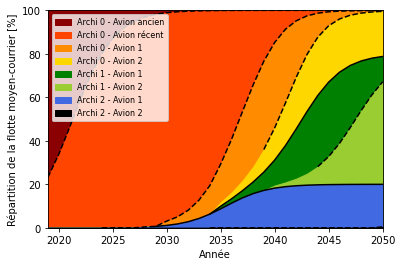

In [121]:
# Calcul et graphes

# Parameter for the logistic function for aircraft
life_base = 25 # 25 according to my first estimation, 15 for DLR

# Warning: if the difference is too important, there could be some problems for the renewal
# Answer: correction made using a specific correction for Aircraft C0 N1, keeping the 2020 value as a fixed point
limit = 2 # 1 is the value use by DLR (98% of aircraft for 15 years)

# Parameter calculation
parameter_base = np.log(100/limit-1)/(life_base/2) # For the actual aircraft
parameter_renewal = np.log(100/limit-1)/(life/2)

# Other parameters
limit_begin = limit # To avoid too early appearance: to be set or calibrated, identical to "limit" by consistency
# Do we consider an end limit ?## IMPORTANT : for defining the functions, we need to know which sub-category will appear first, second and which is the initial one (named 0)


# Category 2
# We define the aircraft in the sub-category 2 (hydrogen). Here, only one aircraft is considered

## Aircraft C2 N1 
year_cat2_1_begin = date_cat2_1
year_cat2_1 = year_cat2_1_begin + life/2
def function_cat2_1(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat2_1)))<limit_begin: # 100 or category_share ?
            value[i] = 0
        else:
            value[i] = category2_share/(1+np.exp(-parameter_renewal*(x[i]-year_cat2_1))) 
    return value

## Aircraft C2 N2 
year_cat2_2_begin = date_cat2_2
year_cat2_2 = year_cat2_2_begin + life/2
def function_cat2_2(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat2_2)))<limit_begin: # 100 or category_share ?
            value[i] = 0
        else:
            value[i] = category2_share/(1+np.exp(-parameter_renewal*(x[i]-year_cat2_2))) 
    return value


# Category 1
# We define the aircraft in the sub-category 1 (turboprop). Here, two aircraft are considered

## Aircraft C1 N1 
year_cat1_1_begin = date_cat1_1
year_cat1_1 = year_cat1_1_begin + life/2
def function_cat1_1(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat1_1)))<limit_begin:
            value[i] = function_cat2_1(x)[i]
        else:
            value[i] = function_cat2_1(x)[i] + category1_share/(1+np.exp(-parameter_renewal*(x[i]-year_cat1_1))) 
    return value

## Aircraft C1 N2 
year_cat1_2_begin = date_cat1_2
year_cat1_2 = year_cat1_2_begin + life/2
def function_cat1_2(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat1_2)))<limit_begin:
            value[i] = function_cat2_1(x)[i]
        else:
            value[i] = function_cat2_1(x)[i] + category1_share/(1+np.exp(-parameter_renewal*(x[i]-year_cat1_2))) 
    return value


# Category 0
# We define the aircraft in the sub-category 0 (initial one, turbofan). 
# Here, three aircraft are considered, but there is no model for the oldest (which represents the difference between the first one and 0)

## Aircraft C0 N1 
year_cat0_1_begin = 2010.35
year_cat0_1_base = year_cat0_1_begin + life_base/2
### WARNING !!!
year_cat0_1 = 2019 - parameter_base/parameter_renewal * (2019 - year_cat0_1_base)
def function_cat0_1(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat0_1)))<limit_begin:
            value[i] = function_cat1_1(x)[i]
        else:
            value[i] = function_cat1_1(x)[i] + (100-function_cat1_1(x)[i])/(1+np.exp(-parameter_renewal*(x[i]-year_cat0_1))) 
    return value

## Aircraft C0 N2 
year_cat0_2_begin = date_cat0_2
year_cat0_2 = year_cat0_2_begin + life/2
def function_cat0_2(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat0_2)))<limit_begin:
            value[i] = function_cat1_1(x)[i]
        else:
            value[i] = function_cat1_1(x)[i] + (100-function_cat1_1(x)[i])/(1+np.exp(-parameter_renewal*(x[i]-year_cat0_2))) 
    return value

## Aircraft C0 N3 
year_cat0_3_begin = date_cat0_3
year_cat0_3 = year_cat0_3_begin + life/2
def function_cat0_3(x):
    value = np.zeros(len(x))
    for i in range(0,len(x)):
        if 100/(1+np.exp(-parameter_renewal*(x[i]-year_cat0_3)))<limit_begin:
            value[i] = function_cat1_1(x)[i]
        else:
            value[i] = function_cat1_1(x)[i] + (100-function_cat1_1(x)[i])/(1+np.exp(-parameter_renewal*(x[i]-year_cat0_3))) 
    return value


# Estimation for years between 2020 and 2050
X = np.linspace(2019,2050,32)    
cent = 100*np.ones(len(X))
cat0_1 = function_cat0_1(X)
cat0_2 = function_cat0_2(X)
cat0_3 = function_cat0_3(X)
cat1_1 = function_cat1_1(X)
cat1_2 = function_cat1_2(X)
cat2_1 = function_cat2_1(X)
cat2_2 = function_cat2_2(X)

# Illustrative plot : share of aircraft
plt.plot(X, cat0_1, "--", color='black')
plt.plot(X[5:32], cat0_2[5:32], "--", color='black')
plt.plot(X[20:32], cat0_3[20:32], "--", color='black')
plt.plot(X[10:32], cat1_1[10:32], "-", color='black')
plt.plot(X[25:32], cat1_2[25:32], "--", color='black')
plt.plot(X[15:32], cat2_1[15:32], "-", color='black')
plt.plot(X[15:32], cat2_2[15:32], "--", color='black')
plt.fill_between(X, cent, color='darkred', label='Archi 0 - Avion ancien')
plt.fill_between(X, cat0_1, color='orangered', label='Archi 0 - Avion récent')
plt.fill_between(X, cat0_2, color='darkorange', label='Archi 0 - Avion 1')
plt.fill_between(X, cat0_3, color='gold', label='Archi 0 - Avion 2')
plt.fill_between(X, cat1_1, color='green', label='Archi 1 - Avion 1')
plt.fill_between(X, cat1_2, color='yellowgreen', label='Archi 1 - Avion 2')
plt.fill_between(X, cat2_1, color='royalblue', label='Archi 2 - Avion 1')
plt.fill_between(X, cat2_2, color='black', label='Archi 2 - Avion 2')
plt.xlim(2019,2050)
plt.ylim(0,100)
plt.legend(loc='upper left', prop={'size': 8})
plt.xlabel("Année")
plt.ylabel("Répartition de la flotte moyen-courrier [%]")
plt.show()


Évolution de la consommation énergétique par siège-kilomètre en 2050 par rapport à 2020 : -44.9 %
Amélioration annuelle de l'efficacité énergétique par siège-kilomètre entre 2020 et 2050 : 1.97 %



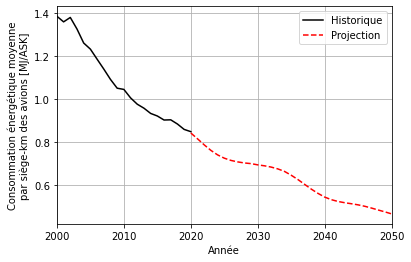

In [122]:
# Historical
Xold = np.linspace(2000,2020,21)

EnergyPerASK_mean_historical = [1.38474711, 1.35865667, 1.37913787, 1.32541835, 1.26048758, 1.23211795, 1.18562571, 1.13969345, 1.09161951, 1.05076049, 1.04515426, 1.00588758, 0.97650892, 0.95796147, 0.93368592, 0.92173733, 0.90307,    0.9039976, 0.88453932, 0.8595559, 0.84903338]


# Energy consumption per seat (MJ/ASK)
## Old aircraft
EnergyPerASK_aircraftC0N0 = 0.9163 # Estimated with old generation of 81.4gCO2/RPK (direct emission, mean load factor)
EnergyPerASK_aircraftC0N1 = 0.6979 # Estimated with recent generation of 62gCO2/RPK (direct emission, mean load factor)
## New aircraft
EnergyPerASK_aircraftC0N2 = EnergyPerASK_aircraftC0N1*(1-reduction_aircraftC0N2/100)
EnergyPerASK_aircraftC0N3 = EnergyPerASK_aircraftC0N1*(1-reduction_aircraftC0N3/100)
EnergyPerASK_aircraftC1N1 = EnergyPerASK_aircraftC0N1*(1-reduction_aircraftC1N1/100)
EnergyPerASK_aircraftC1N2 = EnergyPerASK_aircraftC0N1*(1-reduction_aircraftC1N2/100)
EnergyPerASK_aircraftC2N1 = EnergyPerASK_aircraftC0N1*(1-reduction_aircraftC2N1/100)
EnergyPerASK_aircraftC2N2 = EnergyPerASK_aircraftC0N1*(1-reduction_aircraftC2N2/100)

EnergyPerASK_mean = EnergyPerASK_aircraftC0N0 * (100-cat0_1)/100 + EnergyPerASK_aircraftC0N1 * (cat0_1-cat0_2)/100 + EnergyPerASK_aircraftC0N2 * (cat0_2-cat0_3)/100 +EnergyPerASK_aircraftC0N3 * (cat0_3-cat1_1)/100 +EnergyPerASK_aircraftC1N1 * (cat1_1-cat1_2)/100 +EnergyPerASK_aircraftC1N2 * (cat1_2-cat2_1)/100 +EnergyPerASK_aircraftC2N1 * (cat2_1-cat2_2)/100 +EnergyPerASK_aircraftC2N2 * cat2_2/100                      

print("")
print("Évolution de la consommation énergétique par siège-kilomètre en 2050 par rapport à 2020 :", np.round(100*(EnergyPerASK_mean[30]/EnergyPerASK_mean[0]-1), 1), "%")
print("Amélioration annuelle de l'efficacité énergétique par siège-kilomètre entre 2020 et 2050 :", np.round(100*(1-(1+(EnergyPerASK_mean[30]/EnergyPerASK_mean[0]-1))**(1/30)),2), "%")
print("")

plt.plot(Xold, EnergyPerASK_mean_historical, color="black", label="Historique")
plt.plot(X[1:len(X)], EnergyPerASK_mean[1:len(X)], "--", color="red", label="Projection")
plt.xlim(2000,2050)
plt.grid()
plt.legend()
plt.xlabel("Année")
plt.ylabel("Consommation énergétique moyenne\npar siège-km des avions [MJ/ASK]")
plt.show()

> **Réponses**

-----
### 2.2. Approche *top-down*

Cette partie se focalise sur une approche *top-down* basée sur l'utilisation d'un gain moyen annucel de l'efficacité énergétique. 

Choisissez des hypothèses d'évolution de la consommation énergétique pour les catégories court-courrier régional, long-courrier et fret. Vous justifierez simplement et rapidement ces choix tout en précisant éventuellement le type de carburant utilisé/utilisable.

> **Réponses**

-----
-----
## 3. Amélioration de l'efficacité énergétique via les opérations
<a id="3"></a>

L'objectif de cette partie est de régler les paramètres des modèles (de type sigmoïde) concernant l'amélioration des opérations à horizon 2050. Ces derniers seront utilisés pour réaliser des scénarios prospectifs dans le BE4 avec l'outil CAST.

On considère que des gains de l'ordre de 6% sont possibles à horizon 2050. En supposant que les gains au niveau opérationnel atteindront environ 2% en 2035 par rapport à 2020, déterminez un paramétrage possible du gain final, de l'année de début de transition et de la durée de transition qui permet de respecter les différentes contraintes. Vérifiez la cohérence des paramétrages réalisés.

In [138]:
### SAISISSEZ VOS VALEURS ICI (SANS MODIFIER LE NOM DES VARIABLES)

# Choix du gain final (valeur en %)
final_gain =6
# Choix de la durée de transition (qui permet d'atteindre 98% du gain final)
duration =38
# Choix de l'année de début de transition (supérieure ou égale à 2020)
first_year =2020

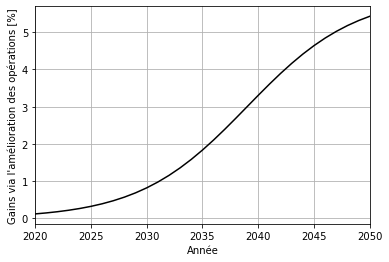

In [139]:
year = np.linspace(2020,2050,31)

def evolution_operation(final_gain, first_year, duration):
    transition_year = first_year + duration/2
    limit_operation = 0.02*final_gain
    parameter_operation = np.log(100/2-1)/(duration/2)
    value = np.zeros(len(year))
    for i in range(0,len(year)):
        if final_gain/(1+np.exp(-parameter_operation*(year[i]-transition_year)))<limit_operation:
            value[i] = 0
        else:
            value[i] = final_gain/(1+np.exp(-parameter_operation*(year[i]-transition_year)))
    return value

annual_gain = evolution_operation(final_gain, first_year, duration)

plt.plot(year, annual_gain, color="black")
plt.xlim(2020,2050)
plt.grid()
plt.xlabel("Année")
plt.ylabel("Gains via l'amélioration des opérations [%]")
plt.show()

-----
-----
## 4. Amélioration de l'efficacité énergétique via le taux de remplissage
<a id="4"></a>

L'objectif de cette dernière partie est de simplement estimer le taux de remplissage moyen de la flotte à horizon 2050.

Pour déterminer cette hypothèse, vous pouvez par exemple (au choix) : 
- réaliser une projection tendancielle des données historiques
- trouver des informations et projections industrielles
- trouver les meilleurs taux de remplissage atteints par des compagnies aériennes
- ...

Expliquez votre démarche et indiquez la valeur que vous aurez retenue.

> **Réponses**

In [130]:
# Valeur retenue 95%